 ## Getting started with the New York City Taxis ML Project

In [0]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
import numpy as np
import pandas as pd

###### fetch data

In [0]:
import Main as main

In [0]:
train = pd.read_csv("/content/drive/My Drive/Data/train.csv")
test= pd.read_csv("/content/drive/My Drive/Data/test.csv")

In [0]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,5.515396e-03
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,7.406066e-02
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,0.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,0.000000e+00
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,0.000000e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,1.000000e+00


###### showing data

In [7]:
train_taxi = main.get_data("/content/drive/My Drive/Data/train.csv")
test_taxi = main.get_test_data("/content/drive/My Drive/Data/test.csv")
subway = pd.read_csv("/content/drive/My Drive/Data/subway.csv")
train_taxi.head()
# we have 1,458,644 record and 11 attributes in train dataset.

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,0


###### Quick description of data 

In [0]:
train_taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444051 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1444051 non-null object
vendor_id             1444051 non-null int64
pickup_datetime       1444051 non-null datetime64[ns]
dropoff_datetime      1444051 non-null datetime64[ns]
passenger_count       1444051 non-null int64
pickup_longitude      1444051 non-null float64
pickup_latitude       1444051 non-null float64
dropoff_longitude     1444051 non-null float64
dropoff_latitude      1444051 non-null float64
trip_duration         1444051 non-null int64
store_and_fwd_flag    1444051 non-null uint8
dtypes: datetime64[ns](2), float64(4), int64(3), object(1), uint8(1)
memory usage: 122.6+ MB


In [0]:
train_taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag
count,1.444051e+06,1.444051e+06,1.444051e+06,1.444051e+06,1.444051e+06,1.444051e+06,1.444051e+06,1.444051e+06
mean,1.534077e+00,1.663301e+00,-7.397430e+01,4.075132e+01,-7.397378e+01,4.075205e+01,8.074555e+02,5.401471e-03
std,4.988376e-01,1.313507e+00,7.013125e-02,3.230156e-02,7.016071e-02,3.540897e-02,5.754200e+02,7.329597e-02
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399191e+01,4.073761e+01,-7.399133e+01,4.073616e+01,3.950000e+02,0.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398181e+01,4.075423e+01,-7.397977e+01,4.075460e+01,6.560000e+02,0.000000e+00
75%,2.000000e+00,2.000000e+00,-7.396765e+01,4.076839e+01,-7.396317e+01,4.076990e+01,1.058000e+03,0.000000e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.439000e+03,1.000000e+00


In [0]:
# set id as index 
train_taxi.set_index('id', inplace=True)

###### Quick way to get a feel with data that we're dealing with

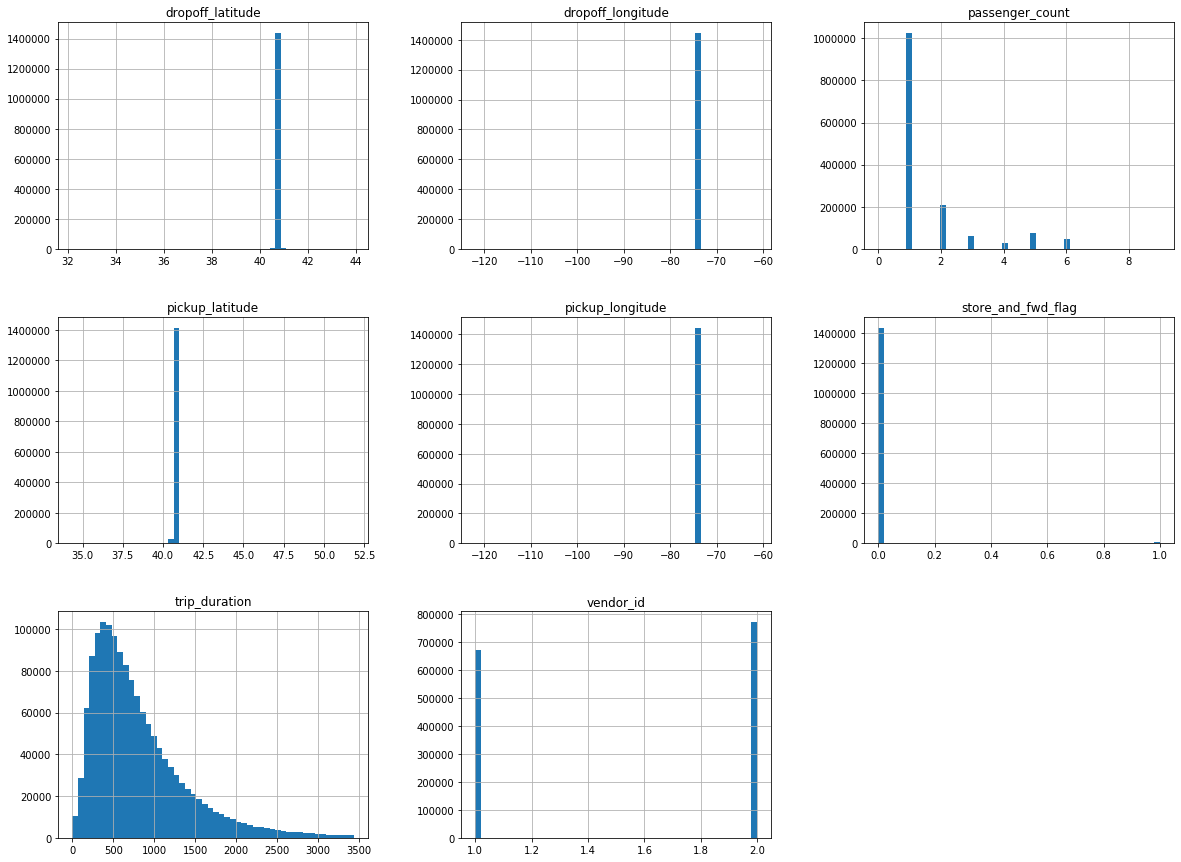

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
train_taxi.hist(bins=50, figsize=(20,15))
plt.show()


###### Visualizing Geographical Data (pickup locations)

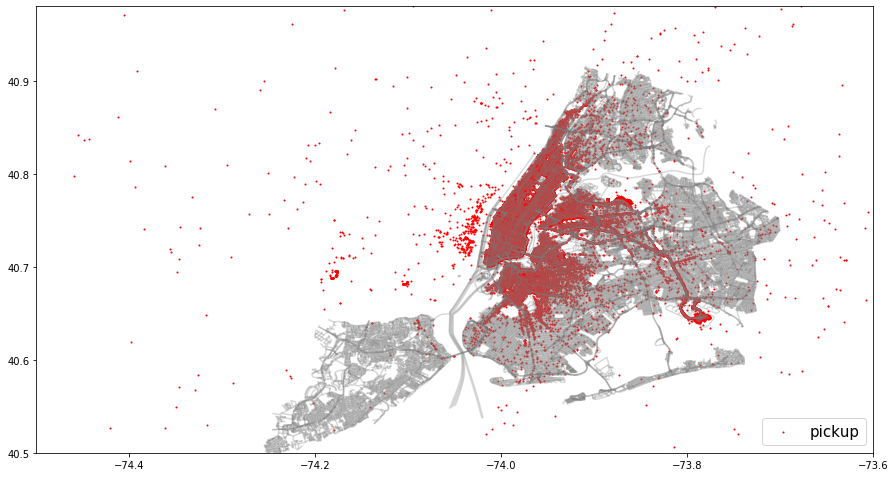

<Figure size 432x288 with 0 Axes>

In [0]:
# Plotting Geographical data of pickup locations in New York City

import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

nyc_map = gpd.read_file("/content/drive/My Drive/Data/nyc_roads.shp")

geometry = [Point(xy) for xy in zip(train_taxi["pickup_longitude"],train_taxi["pickup_latitude"])]
geo_train_data = gpd.GeoDataFrame(train_taxi,
                                  crs='EPSG:4326',
                                  geometry=geometry)

figure,ax = plt.subplots(figsize=(15,15))
nyc_map.plot(ax=ax, alpha=0.3, color="grey", edgecolor='black')
geo_train_data.plot(ax=ax, markersize=1, color ="red",
                    marker = "o",
                    label = "pickup")
plt.xlim(-74.50,-73.60)
plt.ylim( 40.50,40.98)
plt.legend(prop={'size': 15})
plt.show()
plt.savefig('/content/drive/My Drive/Data/pickup.png')
# train_taxi.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", alpha=0.1)

###### Visualizing Geographical Data (dropoff locations)

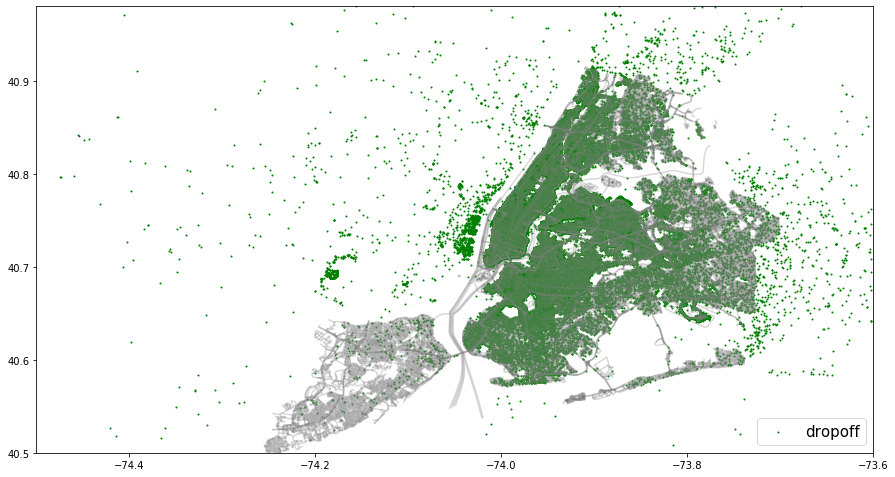

In [0]:
# Plotting Geographical data of pickup locations in New York City

import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

nyc_map = gpd.read_file("/content/drive/My Drive/Data/nyc_roads.shp")

geometry = [Point(xy) for xy in zip(train_taxi["dropoff_longitude"],train_taxi["dropoff_latitude"])]
geo_train_data = gpd.GeoDataFrame(train_taxi,
                                  crs='EPSG:4326',
                                  geometry=geometry)

figure,ax = plt.subplots(figsize=(15,15))
nyc_map.plot(ax=ax, alpha=0.3, color="grey")
geo_train_data.plot(ax=ax, markersize=1, color ="green",
                    marker = "o",
                    label = "dropoff")
plt.xlim(-74.50,-73.60)
plt.ylim( 40.50,40.98)
plt.legend(prop={'size': 15})
plt.show()


###### Looking for Correlation between data
###### standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the corr() method

In [0]:
matrix_correlation = train_taxi.corr()

###### Now let’s look at how much each attribute correlates with the trip duration value:

In [0]:
matrix_correlation["trip_duration"].sort_values(ascending=False)

trip_duration         1.000000
pickup_longitude      0.306657
dropoff_longitude     0.230599
store_and_fwd_flag    0.021760
passenger_count       0.014956
vendor_id             0.007264
dropoff_latitude     -0.177400
pickup_latitude      -0.189843
Name: trip_duration, dtype: float64

Another way to check for correlation between attributes is to use Pandas’
scatter_matrix function, which plots every numerical attribute against every other
numerical attribute. Since there are now 10 numerical attributes, we would get 10² =100 plots, which would not fit on a page, so let’s just focus on a few promising
attributes that seem most correlated with the trip duration

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eaa3d8128>,
      dtype=object)

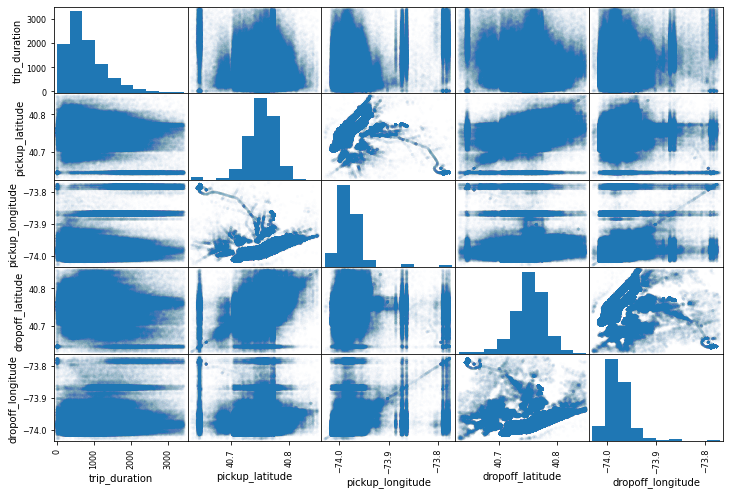

In [0]:
%matplotlib inline
from pandas.plotting import scatter_matrix
attributes = ["trip_duration",
              "pickup_latitude",
              "pickup_longitude",
              "dropoff_latitude",
              "dropoff_longitude"
              ]
scatter_matrix(train_taxi[attributes], figsize=(12, 8), alpha=0.01)

In [0]:
#     excluding all pickup and dropoff locations that are outside of new York City
xlim = [-74.03, -73.77]
ylim = [40.63, 40.85]
train_taxi = train_taxi[(train_taxi.pickup_longitude> xlim[0]) & (train_taxi.pickup_longitude < xlim[1])]
train_taxi = train_taxi[(train_taxi.dropoff_longitude> xlim[0]) & (train_taxi.dropoff_longitude < xlim[1])]
train_taxi = train_taxi[(train_taxi.pickup_latitude> ylim[0]) & (train_taxi.pickup_latitude < ylim[1])]
train_taxi = train_taxi[(train_taxi.dropoff_latitude> ylim[0]) & (train_taxi.dropoff_latitude < ylim[1])]

### After removing all coordinates that are approximatively not included inside new york city  we will get 1,425,132 trips instead of 1,444,051 ( we got rid of 18,919 rows which is 1.31 % of the original data )

In [0]:
train_taxi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1425132 entries, id2875421 to id1209952
Data columns (total 10 columns):
vendor_id             1425132 non-null int64
pickup_datetime       1425132 non-null datetime64[ns]
dropoff_datetime      1425132 non-null datetime64[ns]
passenger_count       1425132 non-null int64
pickup_longitude      1425132 non-null float64
pickup_latitude       1425132 non-null float64
dropoff_longitude     1425132 non-null float64
dropoff_latitude      1425132 non-null float64
trip_duration         1425132 non-null int64
store_and_fwd_flag    1425132 non-null uint8
dtypes: datetime64[ns](2), float64(4), int64(3), uint8(1)
memory usage: 110.1+ MB


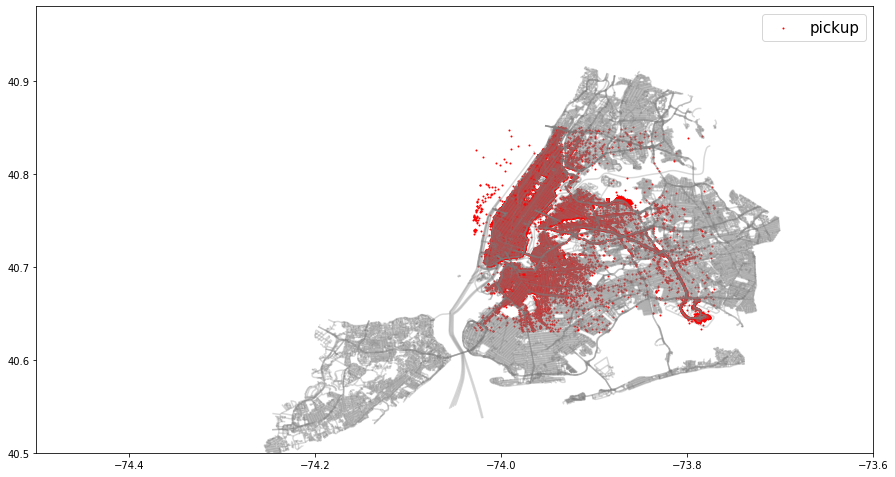

In [0]:
# Plotting Geographical data of pickup locations in New York City

import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

nyc_map = gpd.read_file("/content/drive/My Drive/Data/nyc_roads.shp")

geometry = [Point(xy) for xy in zip(train_taxi["pickup_longitude"],train_taxi["pickup_latitude"])]
geo_train_data = gpd.GeoDataFrame(train_taxi,
                                  crs='EPSG:4326',
                                  geometry=geometry)

figure,ax = plt.subplots(figsize=(15,15))
nyc_map.plot(ax=ax, alpha=0.3, color="grey")
geo_train_data.plot(ax=ax, markersize=1, color ="red",
                    marker = "o",
                    label = "pickup")
plt.xlim(-74.50,-73.60)
plt.ylim( 40.50,40.98)
plt.legend(prop={'size': 15})
plt.show()

# train_taxi.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", alpha=0.1)

## Creating new attributes to dive deep into date's pickup

In [0]:
train_taxi['month'] = train_taxi['pickup_datetime'].map(lambda x: int(x.month))
train_taxi['day'] = train_taxi['pickup_datetime'].map(lambda x: int(x.day))
train_taxi['hours'] = train_taxi['pickup_datetime'].map(lambda x: int(x.hour))
test_taxi['hours'] = test_taxi['pickup_datetime'].map(lambda x: int(x.hour))
train_taxi['minutes'] = train_taxi['pickup_datetime'].map(lambda x: int(x.minute))
train_taxi['seconds'] = train_taxi['pickup_datetime'].map(lambda x: int(x.second))
train_taxi['month_day'] = train_taxi['pickup_datetime'].map(lambda x: str(x.month) +str("_")+ str(x.day))

In [0]:
from pandas.tseries.offsets import CustomBusinessDay
from pandas.tseries.holiday import USFederalHolidayCalendar

us_bd = CustomBusinessDay(calendar = USFederalHolidayCalendar())
# faire correspondre ces jours avec nos données
business_days_1 = pd.DatetimeIndex(start = train_taxi.pickup_datetime.min(), 
                                 end = train_taxi.pickup_datetime.max(), 
                                 freq = us_bd)
business_days_2 = pd.DatetimeIndex(start = test_taxi.pickup_datetime.min(), 
                                 end = test_taxi.pickup_datetime.max(), 
                                 freq = us_bd)

business_days_1 = pd.to_datetime(business_days_1).date
business_days_2 = pd.to_datetime(business_days_2).date

train_taxi['pickup_businessday'] = pd.to_datetime(train_taxi.pickup_datetime.dt.date).isin(business_days_1)
train_taxi['pickup_businessday'] = train_taxi.pickup_businessday.map(lambda x: 1 if x == True else 0)

test_taxi['pickup_businessday'] = pd.to_datetime(test_taxi.pickup_datetime.dt.date).isin(business_days_2)
test_taxi['pickup_businessday'] = test_taxi.pickup_businessday.map(lambda x: 1 if x == True else 0)

Show distribution of pickup months over all trips in a histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3817508048>]],
      dtype=object)

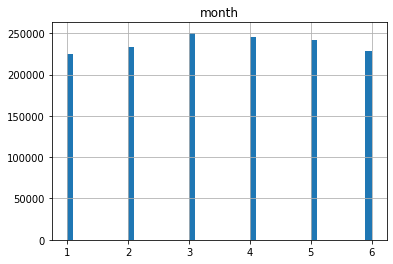

In [0]:
train_taxi.hist(column='month', bins=50)

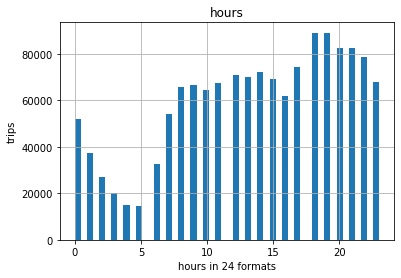

In [0]:
axarr = train_taxi.hist(column='hours', bins=50)
for ax in axarr.flatten():
    ax.set_xlabel("hours in 24 formats")
    ax.set_ylabel("trips")

Add attributes that convert the number of the day to weekday name

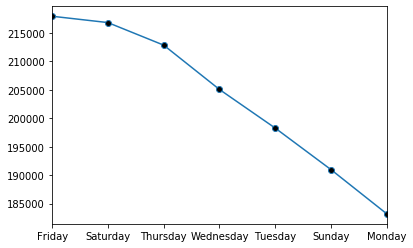

In [0]:
train_taxi.day_of_week.value_counts().plot(marker='o', markerfacecolor='black')

## Add a boolean attribute that represents United States Federal holidays, the aim of this new attribute is to see wether holidays can affects the number of trips


In [0]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

date_range = pd.date_range(start=train_taxi.pickup_datetime.min(), end=train_taxi.pickup_datetime.max())
cal = calendar()
holidays = cal.holidays(start=date_range.min(), end=date_range.max())
train_taxi['Holiday'] = train_taxi['pickup_datetime'].isin(holidays)

In [0]:
train_taxi.Holiday.value_counts()
# None of the days was a holiday so we can delete this column

False    1425132
Name: Holiday, dtype: int64

In [0]:
del train_taxi['Holiday']

## add attribute distance between pickup and dropoff coordinates

In [0]:
import pandas as pd
import numpy as np
from pyproj import Geod


wgs84_geod = Geod(ellps='WGS84') #Distance will be measured on this ellipsoid - more accurate than a spherical method

#Get distance between pairs of lat-lon points
def Distance(lat1,lon1,lat2,lon2):
    az12,az21,dist = wgs84_geod.inv(lon1,lat1,lon2,lat2) #Yes, this order is correct
    return dist

#Add/update a column to the data frame with the distances (in metres)
train_taxi['approx_distance'] = Distance(train_taxi['pickup_latitude'].tolist(),train_taxi['pickup_longitude'].tolist(),train_taxi['dropoff_latitude'].tolist(),train_taxi['dropoff_longitude'].tolist())
test_taxi['approx_distance'] = Distance(test_taxi['pickup_latitude'].tolist(),test_taxi['pickup_longitude'].tolist(),test_taxi['dropoff_latitude'].tolist(),test_taxi['dropoff_longitude'].tolist())





In [0]:
def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

train_taxi['direction'] = bearing_array(train_taxi['pickup_latitude'].values, 
                                train_taxi['pickup_longitude'].values, 
                                train_taxi['dropoff_latitude'].values, 
                                train_taxi['dropoff_longitude'].values)

test_taxi['direction'] = bearing_array(test_taxi['pickup_latitude'].values, 
                                test_taxi['pickup_longitude'].values, 
                                test_taxi['dropoff_latitude'].values, 
                                test_taxi['dropoff_longitude'].values)

In [0]:
train_taxi['approx_distance'] = train_taxi['approx_distance'].apply(lambda x: round(x,3))

## Convert categorigal week day to number 

In [0]:
train_taxi['day_of_week'] = train_taxi['pickup_datetime'].dt.day_name()
test_taxi['day_of_week'] = test_taxi['pickup_datetime'].dt.day_name()

train_taxi['weekday_cat'] = train_taxi['day_of_week'].map({
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7
})

test_taxi['weekday_cat'] = test_taxi['day_of_week'].map({
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7
})

In [0]:
train_taxi.head(5)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,month,day,hours,minutes,seconds,month_day,day_of_week,approx_distance,eucl,weekday_cat,speed,speed_euc,mean_trip_duration
id,,,,,,,,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,0,3,14,17,24,55,3_14,Monday,1502.172,1.498521,1,3.301477,0.003293,796.837574
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,0,6,12,0,43,35,6_12,Sunday,1808.660,1.805507,7,2.727994,0.002723,796.837574
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,0,1,19,11,35,24,1_19,Tuesday,6379.687,6.385098,2,3.003619,0.003006,796.837574
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,0,4,6,19,32,31,4_6,Wednesday,1483.632,1.485498,3,3.458350,0.003463,796.837574
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,0,3,26,13,30,55,3_26,Saturday,1187.038,1.188588,6,2.728823,0.002732,796.837574


## Exploring Correlation between distance and trip duration

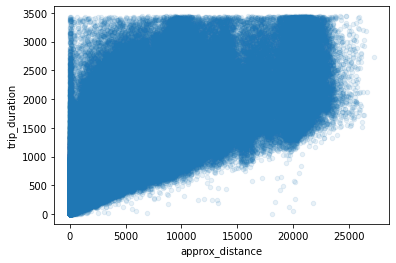

In [0]:
train_taxi.plot(kind="scatter", x="approx_distance", y="trip_duration",
alpha=0.1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f383183a208>,
      dtype=object)

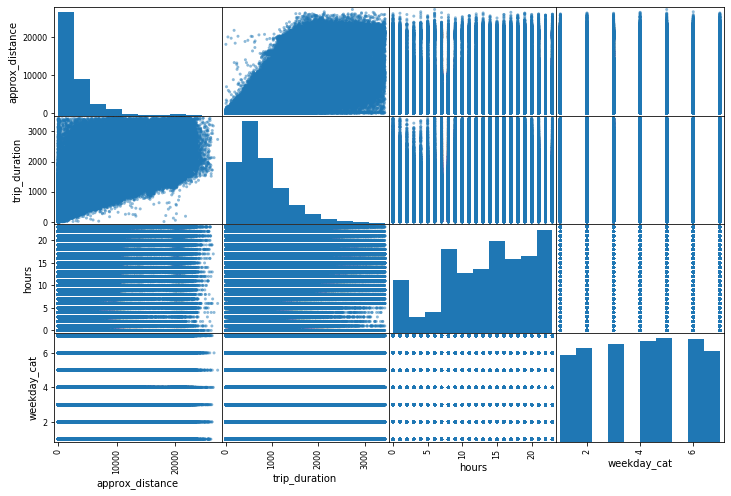

In [0]:
from pandas.plotting import scatter_matrix

attributes = ["approx_distance", "trip_duration", "hours", "weekday_cat"]
scatter_matrix(train_taxi[attributes], figsize=(12, 8))

## Trying to add an attribute that is combination of approximative distance and trip duration ( we will call it speed )

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
train_taxi['pickup_pca'] = pca.fit_transform(train_taxi[['pickup_latitude','pickup_longitude']])
train_taxi['dropoff_pca'] = pca.fit_transform(train_taxi[['dropoff_latitude','dropoff_longitude']])
test_taxi['pickup_pca'] = pca.fit_transform(test_taxi[['pickup_latitude','pickup_longitude']])
test_taxi['dropoff_pca'] = pca.fit_transform(test_taxi[['dropoff_latitude','dropoff_longitude']])

In [0]:
train_taxi['speed'] = train_taxi['approx_distance']/train_taxi['trip_duration']

train_taxi['mean_trip_duration'] = train_taxi['trip_duration'].mean() 


test_taxi['speed']= train_taxi['speed'].median()
test_taxi['mean_trip_duration']=train_taxi['trip_duration'].mean() 

## Taking look at correlation matrix with new attributes (correlation with target value, which is trip duration)

###### Positive Correlation: both variables change in the same direction.
###### Neutral Correlation: No relationship in the change of the variables.
###### Negative Correlation: variables change in opposite directions.

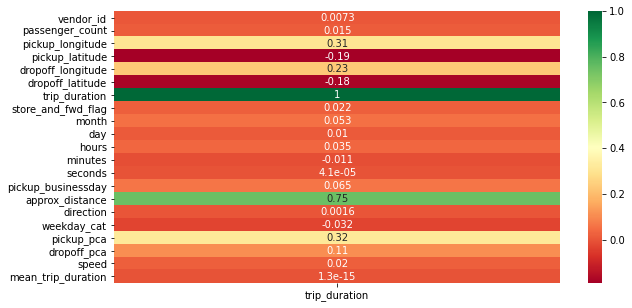

In [0]:
import seaborn as sns

corr_matrix = train_taxi.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(10,5))
#plot heat map
g = sns.heatmap(corr_matrix[['trip_duration']],annot=True,cmap="RdYlGn")

###### approximative distance (positively) , pickup and dropoff locations (negatively) are the most correlated attributes with trip duration

###### Remove rows that have 0 passenger in the trip, so we won't have noisy dataset

In [0]:
train_taxi = train_taxi[(train_taxi['passenger_count'] > 0)]

In [0]:
train_taxi = train_taxi[train_taxi['trip_duration']>1]

###### 1 maps to night, 2 maps to evening, 3 maps to afternoon, 4 maps to morning

In [0]:

# # taxi = train_taxi
def f(x):
    if (x > 4) and (x <= 8):
        #'Early Morning'
        return 1          
    elif (x > 8) and (x <= 12 ):
        #'Morning'
        return 2 
    elif (x > 12) and (x <= 16):
        #'Noon'
        return 3
    elif (x > 16) and (x <= 20) :
        #'Eve'
        return 4
    elif (x > 20) and (x <= 24):
        # 'Night'
        return 5
    elif (x <= 4):
        #'Late Night'
        return 6   
train_taxi.loc[:,'day_part'] = train_taxi['hours'].apply(f)
test_taxi.loc[:,'day_part'] = test_taxi['hours'].apply(f)

In [0]:
import pandas as pd

parse_date_att = ["date"]
weather = pd.read_csv("/content/drive/My Drive/Data/weather.csv", parse_dates=parse_date_att)

In [0]:
weather['month'] = weather['date'].map(lambda x: int(x.month))
weather['day'] = weather['date'].map(lambda x: int(x.day))

In [0]:
import numpy as np

test_taxi['month'] = test_taxi['pickup_datetime'].map(lambda x: int(x.month))
test_taxi['day'] = test_taxi['pickup_datetime'].map(lambda x: int(x.day))

test_taxi = pd.merge(test_taxi, weather,on=['month','day'])
train_taxi = pd.merge(train_taxi, weather, on=['month','day'])

In [0]:
test_taxi.loc[test_taxi['precipitation'] == 'T', 'precipitation'] = 0
test_taxi.loc[test_taxi['snow fall'] == 'T', 'snow fall'] = 0
test_taxi.loc[test_taxi['snow depth'] == 'T', 'snow depth'] = 0

test_taxi['precipitation'] = test_taxi['precipitation'].astype(float)
test_taxi['snow fall'] = test_taxi['snow fall'].astype(float)
test_taxi['snow depth'] = test_taxi['snow depth'].astype(float)

train_taxi.loc[train_taxi['precipitation'] == 'T', 'precipitation'] = 0
train_taxi.loc[train_taxi['snow fall'] == 'T', 'snow fall'] = 0
train_taxi.loc[train_taxi['snow depth'] == 'T', 'snow depth'] = 0

train_taxi['precipitation'] = train_taxi['precipitation'].astype(float)
train_taxi['snow fall'] = train_taxi['snow fall'].astype(float)
train_taxi['snow depth'] = train_taxi['snow depth'].astype(float)

### Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


prepared = train_taxi[['approx_distance','precipitation','mean_trip_duration','weekday_cat','hours','passenger_count', 'speed','day_part']]
labels = train_taxi['trip_duration'].values.reshape(-1,1)

regressor = LinearRegression()  
regressor.fit(prepared, labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Mean Squared Error

In [44]:
from sklearn.metrics import mean_squared_error
my_predictions = regressor.predict(prepared) # use it to calculate the RMSE
error = mean_squared_error(labels, my_predictions)
error = np.sqrt(error)
print("Mean Squared error : " + str(error))
print("minimum trip duration : " + str(train_taxi['trip_duration'].min()))
print("max trip duration : " + str(train_taxi['trip_duration'].max()))

Mean Squared error : 362.1048493500147
minimum trip duration : 2
max trip duration : 3439


## R2 Score

### if R2 is closer to 0, then our model is Bad, if it's closer to 1, then our model is Good.

In [83]:
from sklearn.metrics import r2_score
my_predictions = regressor.predict(prepared) # use it to calculate the RMSE
print("R2 Score is :" +str(r2_score(labels,my_predictions)))
if(abs(r2_score(labels,my_predictions) - 1 <= 1)):
  print("Our Model is Good")
elif(abs(r2_score(labels,my_predictions) - 0 <= 0)):
  print("Our Model is Bad")

R2 Score is :0.6484849597682723
Our Model is Good


In [0]:
X = test_taxi[[
'approx_distance',
'precipitation',
'mean_trip_duration',
'weekday_cat',
'hours',
'passenger_count', 
'speed',
'day_part']]
Submission_lin_reg = pd.DataFrame()
Submission_lin_reg["id"]= test_taxi["id"]
Submission_lin_reg["trip_duration"] = my_prediction

In [0]:
Submission_lin_reg.to_csv("/content/drive/My Drive/Data//sample_submission_L_R.csv",index=False)

# Polynomial Regression

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error


prepared = train_taxi[['approx_distance','precipitation','mean_trip_duration','weekday_cat','hours','passenger_count','speed', 'day_part']]
labels = train_taxi['trip_duration'].values.reshape(-1,1)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
prepared_poly = poly_features.fit_transform(prepared)

model_poly = LinearRegression()
model_poly.fit(prepared_poly, labels)


X = test_taxi[['approx_distance','precipitation','mean_trip_duration','weekday_cat','hours','passenger_count','speed', 'day_part']]
test_poly = poly_features.fit_transform(X)

my_prediction_poly = model_poly.predict(test_poly)


Submission_poly = pd.DataFrame()
Submission_poly["id"]= test_taxi["id"]
Submission_poly["trip_duration"] = my_prediction_poly
Submission_poly.to_csv("/content/drive/My Drive/Data/sample_submission_Poly_Reg.csv",index=False)

# PCA and Filters